<a href="https://colab.research.google.com/github/adiiaryasutaa/learning-about-ai/blob/main/rock_paper_scicors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip '/content/drive/MyDrive/Dataset/rockpaperscisors.zip' -d dataset

Archive:  /content/drive/MyDrive/Dataset/rockpaperscisors.zip
   creating: dataset/rockpaperscisors/
  inflating: dataset/__MACOSX/._rockpaperscisors  
   creating: dataset/rockpaperscisors/paper/
  inflating: dataset/__MACOSX/rockpaperscisors/._paper  
  inflating: dataset/rockpaperscisors/.DS_Store  
  inflating: dataset/__MACOSX/rockpaperscisors/._.DS_Store  
   creating: dataset/rockpaperscisors/rock/
  inflating: dataset/__MACOSX/rockpaperscisors/._rock  
   creating: dataset/rockpaperscisors/scissors/
  inflating: dataset/__MACOSX/rockpaperscisors/._scissors  
  inflating: dataset/rockpaperscisors/paper/7ZGsbIMypDIEZxR0.png  
  inflating: dataset/__MACOSX/rockpaperscisors/paper/._7ZGsbIMypDIEZxR0.png  
  inflating: dataset/rockpaperscisors/paper/DsaaqkHZUN3pmcwH.png  
  inflating: dataset/__MACOSX/rockpaperscisors/paper/._DsaaqkHZUN3pmcwH.png  
  inflating: dataset/rockpaperscisors/paper/BfFGJgByTJnxADwA.png  
  inflating: dataset/__MACOSX/rockpaperscisors/paper/._BfFGJgByTJnxADw

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = '/content/dataset/rockpaperscisors',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256),
)

Found 819 files belonging to 3 classes.


In [6]:
data_train = dataset.take(round(len(dataset) * 0.7))
data_valid = dataset.skip(round(len(dataset) * 0.7)).take(round(len(dataset) * 0.2))
data_test = dataset.skip(round(len(dataset) * 0.9))

In [7]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(data_train, validation_data=data_valid, epochs=12)

Epoch 1/12


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.3813 - loss: 211.7701 - val_accuracy: 0.5375 - val_loss: 1.6122
Epoch 2/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.7550 - loss: 0.7908 - val_accuracy: 0.9000 - val_loss: 0.2847
Epoch 3/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9229 - loss: 0.2426 - val_accuracy: 0.9438 - val_loss: 0.2215
Epoch 4/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9608 - loss: 0.1163 - val_accuracy: 0.9563 - val_loss: 0.1640
Epoch 5/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9889 - loss: 0.0516 - val_accuracy: 0.9750 - val_loss: 0.0728
Epoch 6/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9900 - loss: 0.0452Epoch 7/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.9963 - loss: 0.0177 - val_accuracy: 0.9750 - val_loss: 0.1196
Epoch 8/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.9925 - loss: 0.0200 - val_accuracy: 0.9937 - val_loss: 0.0660
Epoch 9/12
18/18 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/

In [8]:
loss, accuracy = model.evaluate(data_test)
print('Test accuracy :', accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 454ms/step - accuracy: 1.0000 - loss: 0.0058
Test accuracy : 1.0


In [ ]:
# model2 = Sequential([
#     Conv2D(8, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
#     MaxPooling2D(),
#     Conv2D(16, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(3, activation='softmax')
# ])

# model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history2 = model2.fit(data_train, validation_data=data_valid, epochs=12)

In [ ]:
# model3 = Sequential([
#     Conv2D(128, 3, padding='same', activation='relu', input_shape=(256, 256, 3)),
#     MaxPooling2D(),
#     Conv2D(256, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.2),
#     Dense(3, activation='softmax')
# ])

# model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# history3 = model3.fit(data_train, validation_data=data_valid, epochs=12)

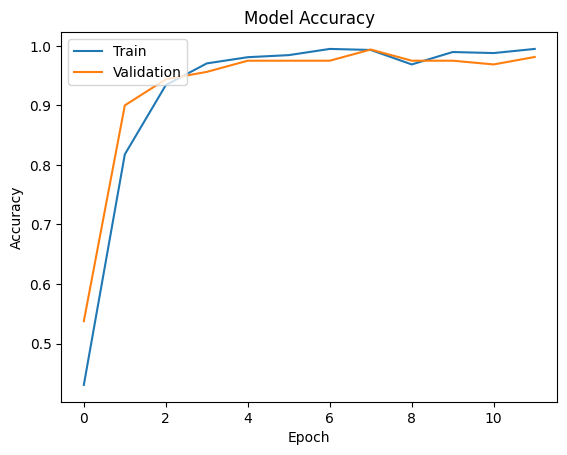

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.plot(history2.history['accuracy'])
# plt.plot(history2.history['val_accuracy'])
# plt.plot(history3.history['accuracy'])
# plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()